I'm curious about what the advisors can tell us about the content of dissertation papers, based on their abstracts. To answer this question, I will use topic modeling on the abstracts and will create a network of dissertaions (and potentially committee advisors/readers) to see how the connections in the network are reflected in the topic model. 
* In the notebook "data_cleanup_MertO.ipynb," I read and clean up the dataset (abstracts, committee members, etc.). Data cleanup and preprocessing is in that file.
* Then I use the abstracts here to generate a topic model. I remove stopwords and implement my method here.
* Afterwards, I also made a network of thesis committee advisors/readers to explore the data and learn the networkx library in the notebook "advisor_network_MertO.ipynb".

In [2]:
import pandas as pd

In [3]:
#Read data from the cleaned-up file
thesis_df = pd.read_csv('theses.csv')
thesis_df

,title,school,department,degree,submitting_type,language,subfield,research_field,keyword,committee_chair,committee_members,graduation_year,partnering_agency,abstract_length,abstract
0,Does Inflammation Damage White Matter ...,Emory College,Neuroscience and Behavioral Biology,B.S.,Honors Thesis,English,NaN,"Health Sciences, Mental Health; Psychology, Ps...",Neurobiology; Depression; DTI Imaging,Boadie Dunlop,Kate O'Toole;Micheal Crutcher,2020,NaN,2451,Background: Major depressive disorder (MDD) is...
1,Chlorhexidine bigluconate resistance in Met...,Rollins School of Public Health,Epidemiology,M.P.H.,Master's Thesis,English,Epidemiology - MPH & MSPH,"Health Sciences, Epidemiology; Biology, Microb...",MRSA; Antimicrobial Resistance,Scott Fridkin,Sarah Satola,2020,NaN,2283,Background: With increased chlorhexidine use i...
2,IRF4 controls cell fate outcomes during the...,Laney Graduate School,Biological and Biomedical Sciences,Ph.D.,Dissertation,English,Genetics and Molecular Biology,"Health Sciences, Immunology; Biology, Cell; Bi...",Plasma cell; IRF4; B cell; MYC; L-selectin; CD...,Joshy Jacob;Roger B. Deal;Jeremy M. Boss;Willi...,NaN,2021,NaN,3042,Naive B cell (nB) differentiation to antibody-...
3,From Surviving to Thriving: Exploring Healt...,Candler School of Theology,Ministry,DMin,Dissertation,English,NaN,Theology,Succession,Jennifer Ayres,Teresa Fry Brown,2021,NaN,1092,This project focuses on developing strategic p...
4,Maternal Exposures to Cigarette Smoking and ...,Rollins School of Public Health,Epidemiology,M.P.H.,Master's Thesis,English,Epidemiology - MPH & MSPH,"Health Sciences, Public Health; Health Science...",case-control study; alcohol; birth defects; ep...,Vijaya Kancherla;Paul Romitti,NaN,2020,"University, college or education institution (...",2606,BACKGROUND: Congenital diaphragmatic hernia (...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,Zimbabwe's Maturing HIV Epidemic: A Triangulat...,Rollins School of Public Health,Hubert Department of Global Health,MPH,Master's Thesis,English,NaN,"Health Sciences, Public Health",Zimbabwe; HIV; AIDS; Data triangulation; human...,Roger Rochat,NaN,2015,"International governmental organization (e.g.,...",1955,Objective: To assess Zimbabwe's HIV prevalence...
9977,Zooarchaeological Faunal Identifiability: Usin...,Emory College,Anthropology,B.S.,Honors Thesis,English,NaN,"Anthropology, Archaeology",GIS; Faunal Identifiability; Zooarchaeology,Jessica Thompson;Michael Page,John Lindo;Melvin Konner,2019,NaN,2160,Zooarchaeological analysis aims to identify th...
9978,Zoomorphic Others: The Animalization of Stigma...,Laney Graduate School,English,MA,Master's Thesis,English,NaN,"Literature, General; Literature, Modern",animality; criminality; zoomorphism; animaliza...,Laura Otis,Christina Marie Colvin;Sari B Altschuler,2016,NaN,1584,"Zoomorphism, the act of portraying humans with..."
9979,Zoonotic Diseases in Refugee or Internally Dis...,Rollins School of Public Health,Hubert Department of Global Health,MPH,Master's Thesis,English,NaN,"Agriculture, Animal Pathology; Health Sciences...",Zoonotic Disease; Conflict; Refugee Camp; Camp...,Stephanie Salyer,Casey Barton-Behravesh;Carlos Navarro Colorado,2017,CDC,2238,Introduction: Emerging and re-emerging zoonoti...


In [4]:
#I copied most of this from the mallet notebook
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import numpy as np

path_to_mallet = '../../mallet-2.0.8/bin/mallet'

abstracts = thesis_df['abstract'].tolist()

for idx, abstract in enumerate(abstracts):
    abstracts[idx] = little_mallet_wrapper.process_string(abstract, numbers='remove')#remove numbers or they appear in topics as NUM
    
little_mallet_wrapper.print_dataset_stats(abstracts)

Number of Documents: 9981
Mean Number of Words per Document: 173.1
Vocabulary Size: 59011


In [6]:
num_topics = 25
training_data = abstracts

#Change to your desired output directory
output_directory_path = 'topic-model-output'

#No need to change anything below here
# Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"
path_to_diagnostics             = f"{output_directory_path}/diagnostics.xml"
path_to_word_weights            = f"{output_directory_path}/word.weights"

little_mallet_wrapper.import_data(path_to_mallet,
                path_to_training_data,
                path_to_formatted_training_data,
                training_data)

Importing data...
Complete


In [5]:
little_mallet_wrapper.train_topic_model(path_to_mallet,
                      path_to_formatted_training_data,
                      path_to_model,
                      path_to_topic_keys,
                      path_to_topic_distributions,
                      path_to_word_weights,
                      path_to_diagnostics,
                      num_topics)

NameError: name 'path_to_formatted_training_data' is not defined

In [7]:
#This is a list of topics
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['data', 'model', 'methods', 'based', 'method', 'analysis', 'using', 'models', 'used', 'study', 'studies', 'approach', 'results', 'two', 'different', 'network', 'high', 'performance', 'regression', 'time']

✨Topic 1✨

['number', 'problem', 'results', 'graph', 'flow', 'theory', 'system', 'also', 'problems', 'thesis', 'dynamics', 'two', 'numerical', 'image', 'set', 'using', 'properties', 'space', 'particles', 'sports']

✨Topic 2✨

['water', 'food', 'household', 'sanitation', 'children', 'wash', 'households', 'samples', 'rural', 'study', 'contamination', 'environmental', 'hygiene', 'consumption', 'practices', 'access', 'drinking', 'associated', 'insecurity', 'used']

✨Topic 3✨

['study', 'one', 'first', 'two', 'different', 'time', 'well', 'use', 'however', 'within', 'new', 'work', 'also', 'research', 'order', 'many', 'understanding', 'development', 'important', 'three']

✨Topic 4✨

['chapter', 'äôs', 'literary', 'art', 'works', 'music', 'century', 'film', 'thesis', 'texts', 'na

In [8]:
'''
    I'm checking the first 50 documents (abstracts) to see if the topics are realistics. 
    I only look at relevant topics (0.025)
    I just compare the titles to the topics list above
'''

title_list = thesis_df['title'].tolist()
abstract_topics = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)[:50]

for doc_idx, doc in enumerate(abstract_topics):
    print(f"✨Document {doc_idx}✨: " + title_list[doc_idx])
    for topic_num, percent in enumerate(doc):
        if percent < 0.01: continue
        print(f"Topic {topic_num}: {percent}")
    print()

✨Document 0✨:         Does Inflammation Damage White Matter Tracts in Patients with Major Depression
Topic 0: 0.02426665506785337
Topic 3: 0.069080326066974
Topic 15: 0.3054643017152438
Topic 17: 0.28650270054669963
Topic 19: 0.28177430049566116
Topic 24: 0.02404121456657973

✨Document 1✨:    Chlorhexidine bigluconate resistance in Methicillin Resistant Staphylococcus aureus 
Topic 3: 0.17954380482509624
Topic 12: 0.06638511487054616
Topic 13: 0.010247337937627105
Topic 16: 0.045850404621123796
Topic 18: 0.015334864348840493
Topic 21: 0.6782256404377542

✨Document 2✨:    IRF4 controls cell fate outcomes during the initial stages of B cell differentiation 
Topic 0: 0.01738337978643469
Topic 3: 0.1759326758827409
Topic 16: 0.010459611234760802
Topic 18: 0.013773713963455565
Topic 20: 0.12311074358215597
Topic 24: 0.6528748454047361

✨Document 3✨:   From Surviving to Thriving:  Exploring Healthy Pathways to Pastoral Succession in African American Baptist Churches using the Old Testament S

In [9]:
#Let's visualize the topic distribution for the first 25 files
doc_idx = []
topic_idx = []
for i in range(0,25):
    doc_idx.append('Document ' + str(i))
    topic_idx.append('Topic ' + str(i))



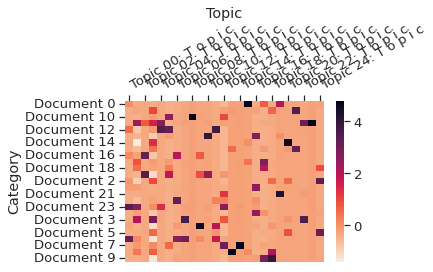

In [10]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(labels=doc_idx,  topic_distributions=abstract_topics, topic_keys=topic_idx)




The topics in this document are reasonable and when compared to the title of the dissertations, they make a lot of sense. Most topics and dissertations are about health but you can see many different focuses: 
* public health (women's health) — topics 5, 9
* public health (weight/exercise) — topic 17
* public health (mental health) — topic 9
* neuroscience — topic 15
* molecular biology — topics 18, 24
* publich health (healthcare industry) — topic 12
* chemistry — topic 13
* public health (developin world) — topic 2
* immunology — topic 20
* epidemiology (prevention) — topic 11
* epidemiology (sexual health)  — topic 8
and so on...
There are also topics outside these
* economis/policy/politics — topic 10
* foreign relations/immigration — topic 24
* theology — topic 22
* AfrAm/women's/cultural studies — topic 7
* data scienc (or quantitative methodology in any context) — topic 0
* humanities/arts — topic 5

This is very promising because topics seem coherent and meaningful. 

I intend to use these topics to cluster the abstracts into groups, similar to Matthew Wilkens. I intend to compare these clusters to the communities I will generate using networks. I don't think it is very novel to compare these two things and then say that they are similar, but maybe I can look at the parts where they differ and see if examining that leads to an interesting insight. I intend to generate a network of dissertaions, but right now I have a network of thesis advisors/readers in the other file.